In [6]:
import pandas as pd
df = pd.read_csv('NationalNames.csv')

In [7]:
#task_1
print(df.head(8))

   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414


In [8]:
#task_3
print(df.keys())

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')


In [8]:
#task_6
byGender = df.groupby(['Gender'])
byGender.Name.nunique()

Gender
F    64911
M    39199
Name: Name, dtype: int64

In [18]:
#task_7
male2010 = df.loc[(df['Gender'] == 'M') & (df['Year'] == 2010)]
print(male2010.head(5))

              Id     Name  Year Gender  Count
1677392  1677393    Jacob  2010      M  22082
1677393  1677394    Ethan  2010      M  17985
1677394  1677395  Michael  2010      M  17308
1677395  1677396   Jayden  2010      M  17152
1677396  1677397  William  2010      M  17030


In [168]:
#task8
mostPopularName1947= df.loc[(df['Year'] == 1947)].sort_values(by=['Count'], ascending=False).head(1)['Name']
print('the name is',mostPopularName1947.item(), 'in 1947')

the name is Linda in 1947


In [169]:
#task_12
byYear = df.groupby(['Year'])
mostUniqueNamesInYear = byYear.Name.nunique().reset_index().sort_values(by=['Name'], ascending=False).head(1)['Year'].item()
df.loc[(df['Year'] == mostUniqueNamesInYear)].sort_values(by=['Count'], ascending=False).head(1)['Name'].item()

'Jacob'

In [41]:
#task_13
jacobWasPopular = df.loc[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')].sort_values(by=['Count'], ascending=False).head(1)
print(jacobWasPopular)

              Id   Name  Year Gender  Count
1455556  1455557  Jacob  2004      F    171


In [39]:
#task_14
femaleSet = df[df.Gender == 'F']
maleSet = df[df.Gender == 'M']
mergedSet = pd.merge(femaleSet, maleSet, how ='inner', on =['Name', 'Year']).groupby(['Year']).Name.nunique().reset_index().sort_values(by=['Name'], ascending=False).head(1)
print(mergedSet)

     Year  Name
128  2008  2557


In [10]:
#task_15
df.groupby(["Year"]).Count.sum().reset_index()

,Year,Count
0,1880,201484
1,1881,192699
2,1882,221538
3,1883,216950
4,1884,243467
...,...,...
130,2010,3686589
131,2011,3646730
132,2012,3643336
133,2013,3626802


In [23]:
#task_16
print(df.groupby(["Year"]).Count.sum().reset_index().sort_values(by=['Count'], ascending=False).head(1)['Year'].to_string())

77    1957


In [145]:
#task_17
f=df.loc[(df['Gender'] == 'F')].groupby(["Year", 'Gender']).Count.sum().reset_index()
m=df.loc[(df['Gender'] == 'M')].groupby(["Year", 'Gender']).Count.sum().reset_index()
accumulate = pd.DataFrame()

accumulate['Year'] = m['Year']
accumulate['F'] = f['Count']
accumulate['M'] = m['Count']
print(accumulate)


     Year        F        M
0    1880    90993   110491
1    1881    91954   100745
2    1882   107850   113688
3    1883   112321   104629
4    1884   129022   114445
..    ...      ...      ...
130  2010  1772738  1913851
131  2011  1753500  1893230
132  2012  1753922  1889414
133  2013  1745339  1881463
134  2014  1768775  1901376

[135 rows x 3 columns]


<AxesSubplot:xlabel='Year'>

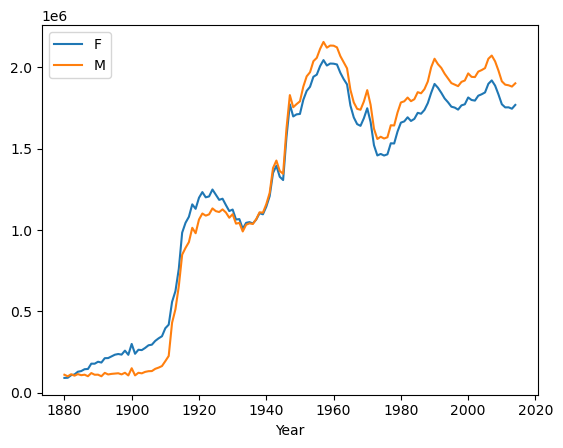

In [146]:
#task_19
accumulate.set_index('Year', inplace = True)
accumulate.plot()

In [110]:
#task_20
femaleSet = df[df.Gender == 'F']
maleSet = df[df.Gender == 'M']
mergedSet = pd.merge(femaleSet, maleSet, how ='inner', on =['Name']).Name.nunique()
print(mergedSet)

10221


In [112]:
#task_22
print('Спостереження проводилося ', df.Year.nunique(), 'років')

Спостереження проводилося  135 років


<AxesSubplot:xlabel='Year'>

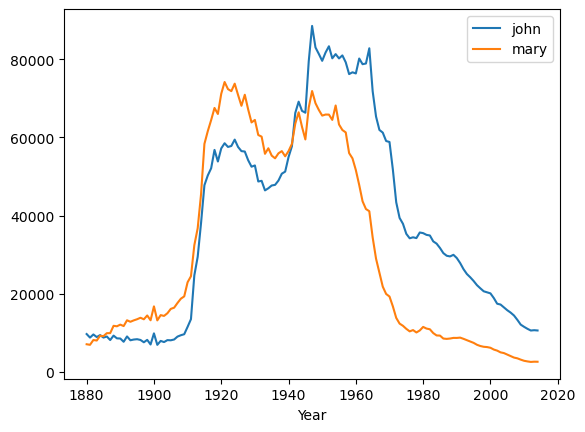

In [154]:
#task_25
john = df.loc[(df['Name']) == 'John'].groupby(['Year']).Count.sum()
mary = df.loc[(df['Name']) == 'Mary'].groupby(['Year']).Count.sum()
johnMary = pd.DataFrame()
johnMary['john'] = john
johnMary['mary'] = mary
johnMary.plot()

<AxesSubplot:xlabel='Year'>

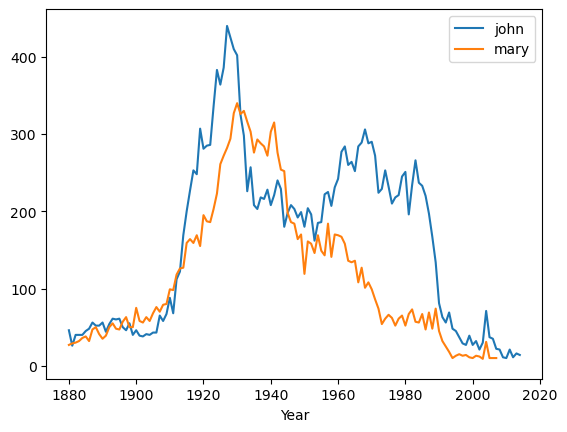

In [184]:
#task_26
johnF= df.loc[(df['Name'] == 'John') & (df['Gender'] == 'F')].groupby(['Year']).Count.sum()
maryM = df.loc[(df['Name'] == 'Mary') & (df['Gender'] == 'M')].groupby(['Year']).Count.sum()
johnMaryNeutral = pd.DataFrame()
johnMaryNeutral['john'] = johnF
johnMaryNeutral['mary'] = maryM
johnMaryNeutral.plot()

In [13]:
#task_27
df.groupby(['Year']).value_counts()

Year  Id       Name       Gender  Count
1880  1        Mary       F       7065     1
      2        Anna       F       2604     1
      1185     Preston    M       47       1
      1196     Glenn      M       43       1
      1195     Christian  M       43       1
                                          ..
2014  1806417  Najia      F       7        1
      1806416  Najat      F       7        1
      1806415  Nairi      F       7        1
      1806414  Naida      F       7        1
      1825433  Zyrin      M       5        1
Length: 1825433, dtype: int64

,Year,Name,freq


In [10]:
for f in df['Year'].unique() :
    df_temp = df[(df['Year']==f)]
    print(df_temp['Count'].idxmax())
    print( df_temp['Count'].loc[df_temp['Count'].idxmax()])

942
9655
2938
8769
4963
9557
7116
8894
9318
9388
10443
9128
12737
9890
15129
9888
17502
11754
20153
11648
22743
12078
25438
11703
28098
13173
31019
12784
33850
13151
36791
13446
39840
13811
42931
13413
45959
14406
49223
13172
52265
16707
55996
13136
59149
14486
62511
14275
65900
14962
69461
16067
73117
16370
76750
17580
80698
18666
84716
19259
88943
22848
93572
24390
98439
32303
104790
36641
111757
45344
119720
58187
129078
61437
138774
64280
148689
67370
159089
65840
169459
70976
180215
73985
191071
72171
201828
71634
212471
73527
223338
70601
233980
67823
244441
70632
254848
66866
265008
63508
274823
64134
289588
60497
293902
59871
303284
55493
312295
56918
326364
56514
335364
58486
344329
61821
353340
62262
362328
59640
371320
62472
380342
66719
389719
77173
399129
80248
408415
76944
417567
74450
427036
87425
431052
99680
441424
96205
451659
91010
468033
86221
478441
87175
489080
87083
499837
86135
510784
88485
521858
88283
533139
90633
544602
92709
556176
90519
567866
85272
579774


In [15]:
#Task_27
mostPopularName = pd.DataFrame()
nameColumn = []
yearColumn = []
countColumn = []
for f in df['Year'].unique() :
    df_temp = df[(df['Year']==f)]
    count = df_temp['Count'].loc[df_temp['Count'].idxmax()]
    name = df['Name'].loc[df_temp['Count'].idxmax()]
    nameColumn.append(name)
    countColumn.append(count)
    yearColumn.append(f)
mostPopularName['Year'] = yearColumn
mostPopularName['Name'] = nameColumn
mostPopularName['Count'] = countColumn

print(mostPopularName)

     Year      Name  Count
0    1880      John   9655
1    1881      John   8769
2    1882      John   9557
3    1883      John   8894
4    1884      John   9388
..    ...       ...    ...
130  2010  Isabella  22883
131  2011    Sophia  21816
132  2012    Sophia  22267
133  2013    Sophia  21147
134  2014      Emma  20799

[135 rows x 3 columns]
